In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [3]:
df = pd.read_csv("df_clean.csv")
df.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,...,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,...,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,...,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,...,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,...,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


DATA PREPROCESSING PART 1

In [4]:
df.shape

(358, 21)

In [5]:
#dropping the unnamed column from the dataset
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [6]:
#checking for null and missing values
df.isnull().sum()

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64

In [7]:
#checking for duplicated values
df.duplicated().sum()

0

In [8]:
df.nunique()

Region                8
State                20
Area                  2
City                 27
Consumer_profile      2
Product_category      2
Product_type          2
AC_1001_Issue         3
AC_1002_Issue         3
AC_1003_Issue         3
TV_2001_Issue         3
TV_2002_Issue         3
TV_2003_Issue         3
Claim_Value         107
Service_Centre        7
Product_Age         188
Purchased_from        3
Call_details         37
Purpose               3
Fraud                 2
dtype: int64

In [9]:
#renaming the values in product issue column
df['AC_1001_Issue'] = df['AC_1001_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['AC_1002_Issue'] = df['AC_1002_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['AC_1003_Issue'] = df['AC_1003_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['TV_2001_Issue'] = df['TV_2001_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['TV_2002_Issue'] = df['TV_2002_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['TV_2003_Issue'] = df['TV_2003_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})

In [10]:
df.describe()

,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
count,358.000000,358.000000,358.000000,358.000000,358.000000
mean,11994.534916,12.812849,201.843575,11.931844,0.097765
std,12063.213579,1.766844,259.731564,11.559474,0.297413
min,0.000000,10.000000,3.000000,0.500000,0.000000
25%,4006.000000,12.000000,14.000000,1.600000,0.000000
50%,7194.000000,13.000000,60.000000,6.500000,0.000000
75%,15000.000000,15.000000,303.750000,23.000000,0.000000
max,50000.000000,16.000000,991.000000,30.000000,1.000000


[Text(0.5, 1.0, 'Areawise Distribution of Fraudulent Claims')]

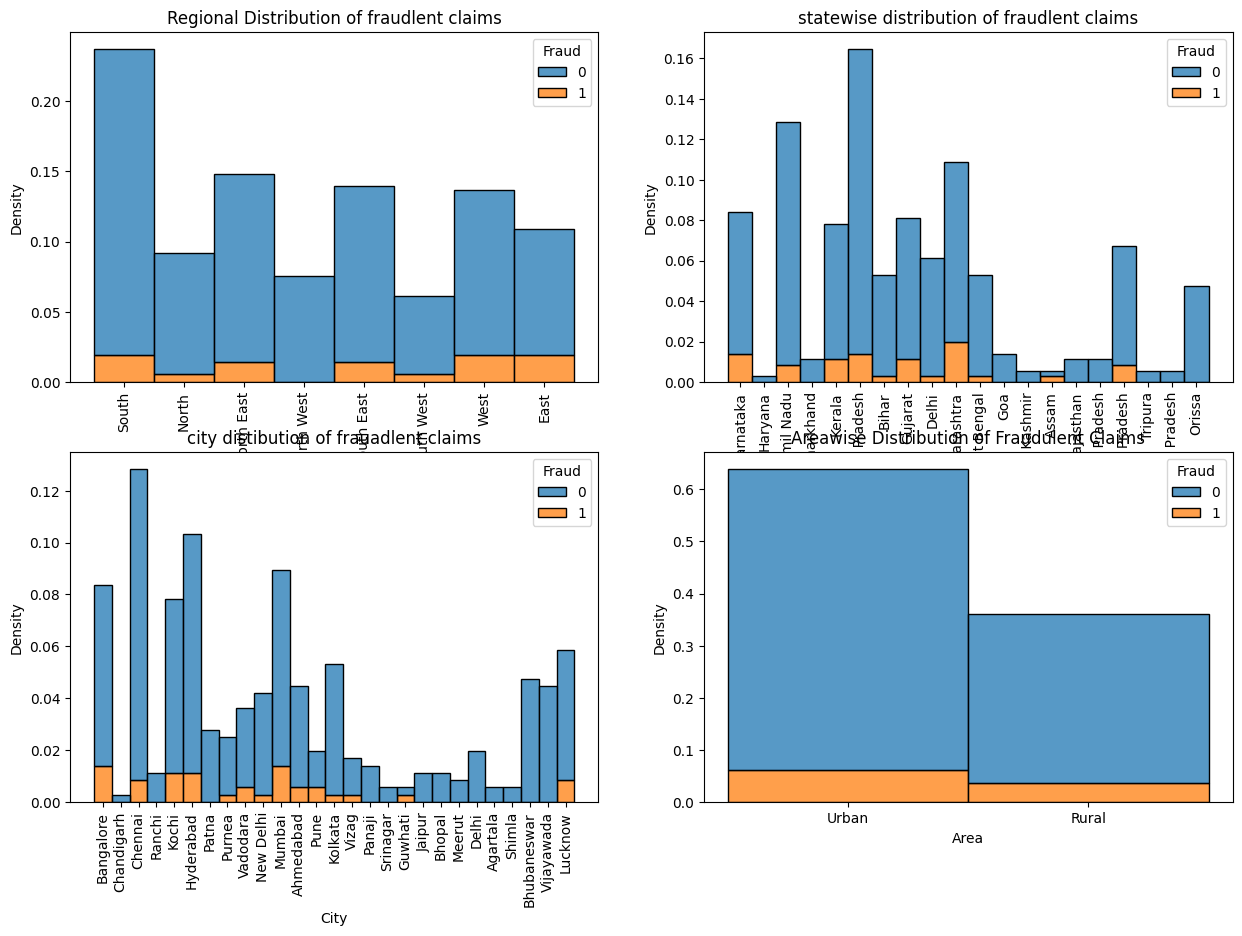

In [11]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

sns.histplot(x = 'Region',data =df,ax =ax[0,0],hue ='Fraud',element = 'bars',fill =True, stat='density',multiple='stack').set(title='Regional Distribution of fraudlent claims'),ax[0,0].xaxis.set_tick_params(rotation=90)
sns.histplot(x ='State',data=df,ax =ax[0,1],hue = 'Fraud',element='bars',fill=True,stat='density',multiple='stack').set(title='statewise distribution of fraudlent claims'),ax[0,1].xaxis.set_tick_params(rotation=90)
sns.histplot(x = 'City',data=df,ax=ax[1,0],hue = 'Fraud',element='bars',fill=True,stat='density',multiple='stack').set(title='city distibution of frauadlent claims'),ax[1,0].xaxis.set_tick_params(rotation=90)
sns.histplot(x = 'Area', data = df, ax =ax[1,1], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Areawise Distribution of Fraudulent Claims')


Consumer Profile and Fraudulent Claims

Text(0.5, 1.0, 'Consumer Profile distribution')

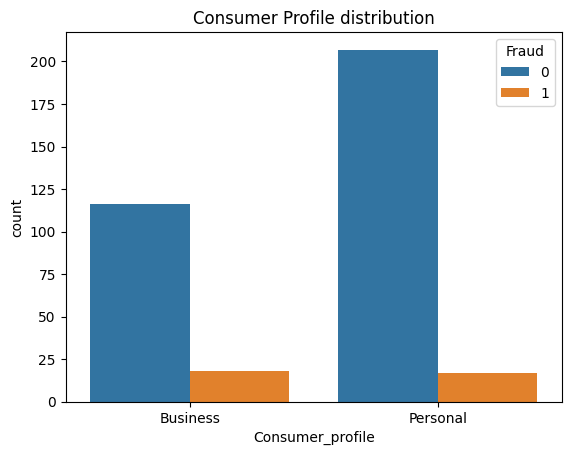

In [12]:
sns.countplot(x = 'Consumer_profile', data = df, hue = 'Fraud').set_title('Consumer Profile distribution')

Product and Fraudulent Claims

<bound method Axes.set_title of <Axes: xlabel='Product_type', ylabel='Count'>>

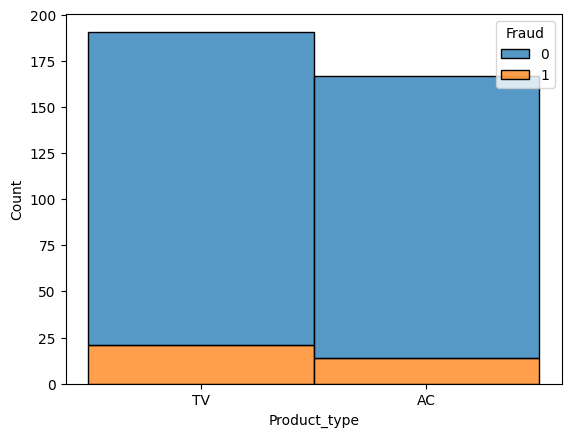

In [13]:
sns.histplot(x = 'Product_type', data = df, hue = 'Fraud', multiple='stack').set_title

Issue with the Product Parts and Fraudulent Claims

[Text(0.5, 1.0, 'TV_2003_Issue and Fraud Distribution')]

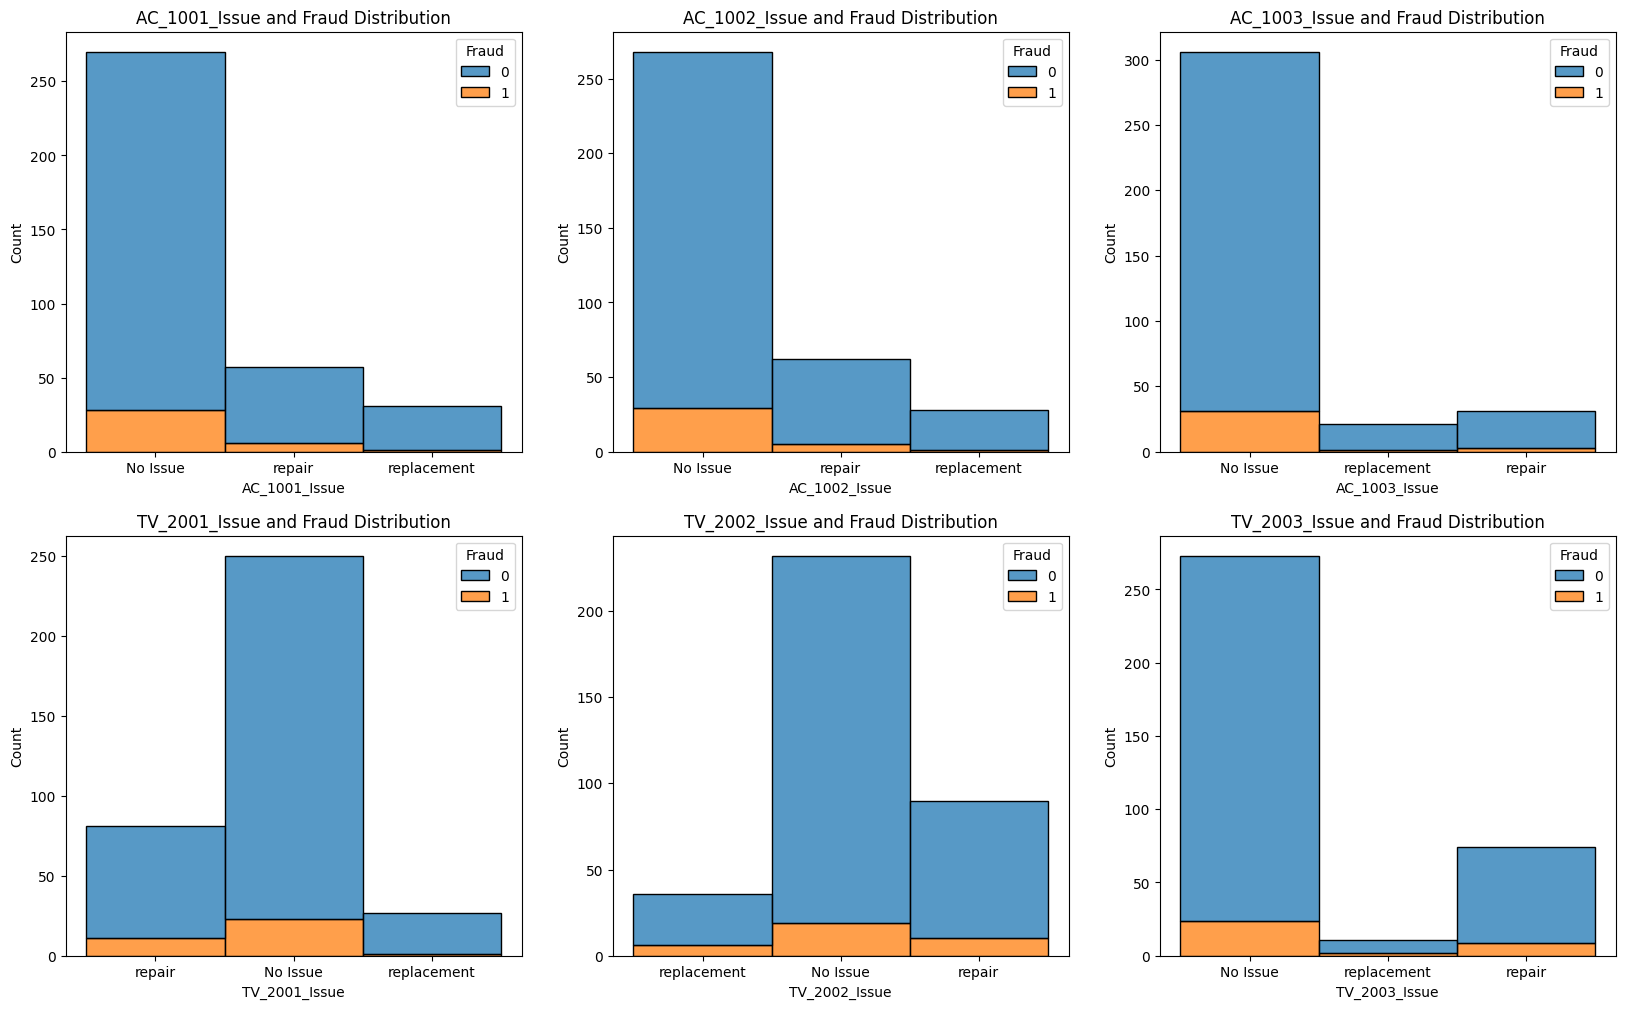

In [15]:
fig, ax = plt.subplots(2,3,figsize=(20,12))
sns.histplot(x = 'AC_1001_Issue', data = df, ax =ax[0,0], hue = 'Fraud', multiple='stack').set(title='AC_1001_Issue and Fraud Distribution')

sns.histplot(x = 'AC_1002_Issue', data = df, ax =ax[0,1], hue = 'Fraud', multiple='stack').set(title='AC_1002_Issue and Fraud Distribution')

sns.histplot(x = 'AC_1003_Issue', data = df, ax =ax[0,2], hue = 'Fraud', multiple='stack').set(title='AC_1003_Issue and Fraud Distribution')

sns.histplot(x = 'TV_2001_Issue', data = df, ax =ax[1,0], hue = 'Fraud', multiple='stack').set(title='TV_2001_Issue and Fraud Distribution')

sns.histplot(x = 'TV_2002_Issue', data = df, ax =ax[1,1], hue = 'Fraud', multiple='stack').set(title='TV_2002_Issue and Fraud Distribution')
sns.histplot(x = 'TV_2003_Issue', data = df, ax =ax[1,2], hue = 'Fraud', multiple='stack').set(title='TV_2003_Issue and Fraud Distribution')

Service Center and Fraudulent Claims

Text(0.5, 1.0, 'Service Centre and Fraudulent Claims')

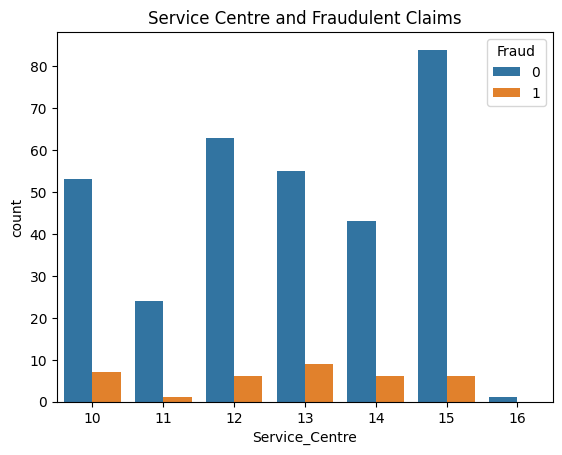

In [16]:
sns.countplot(x = 'Service_Centre', data = df, hue = 'Fraud').set_title('Service Centre and Fraudulent Claims')


Claim Value and Fraudulent Claims

Text(0.5, 1.0, 'Claim Value and Fraudulent Claims')

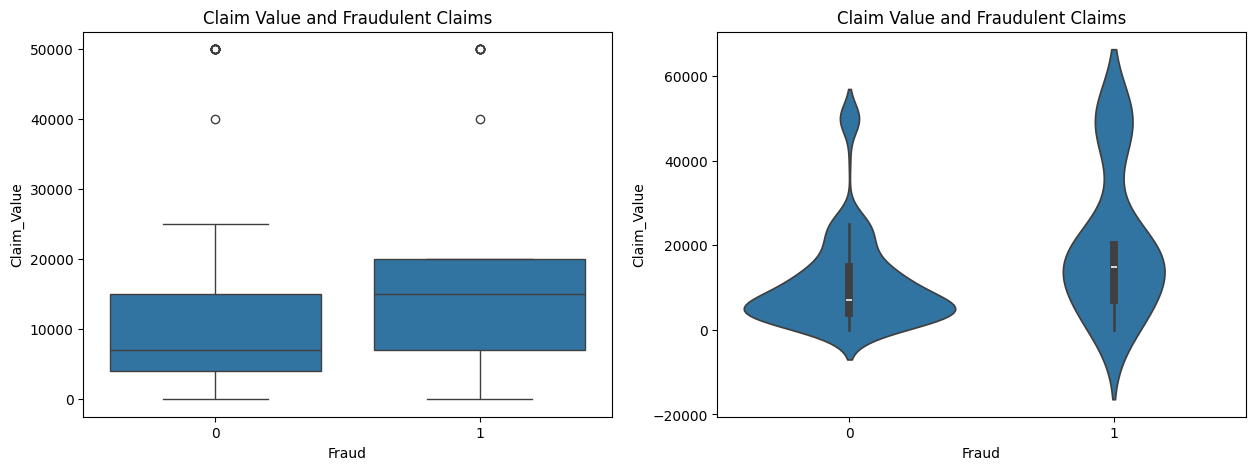

In [17]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'Fraud', y = 'Claim_Value', data = df, ax =ax[0]).set_title('Claim Value and Fraudulent Claims')

sns.violinplot(x = 'Fraud', y = 'Claim_Value', data = df, ax =ax[1]).set_title('Claim Value and Fraudulent Claims')



Product Age and Fraudulent Claims

Text(0.5, 1.0, 'Product Age(in days) and Fraud Distribution')

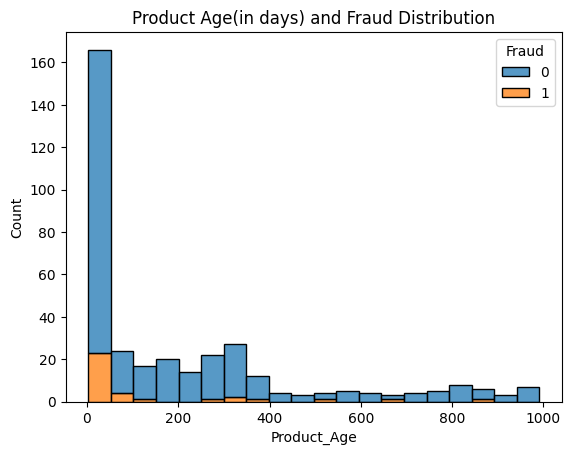

In [18]:
sns.histplot(x = 'Product_Age', data = df, hue = 'Fraud', multiple='stack', bins = 20).set_title('Product Age(in days) and Fraud Distribution')


Purchase point and Fraudulent Claim

Text(0.5, 1.0, 'Purchased from and Fraudulent Claims')

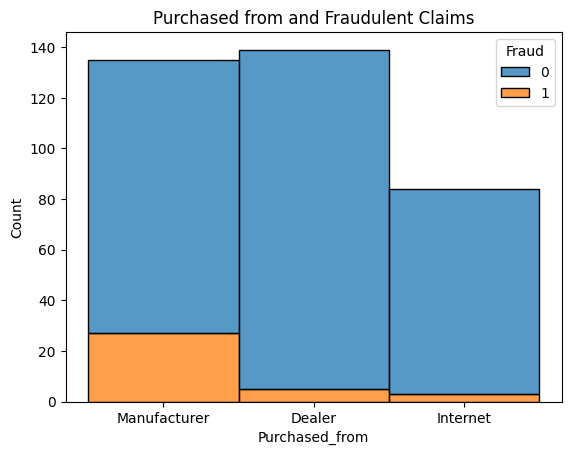

In [19]:
sns.histplot(x = 'Purchased_from', data = df, hue = 'Fraud', multiple='stack').set_title('Purchased from and Fraudulent Claims')


Call Duration and Fraudulent Claims

Text(0.5, 0, 'Call Duration(in mins)')

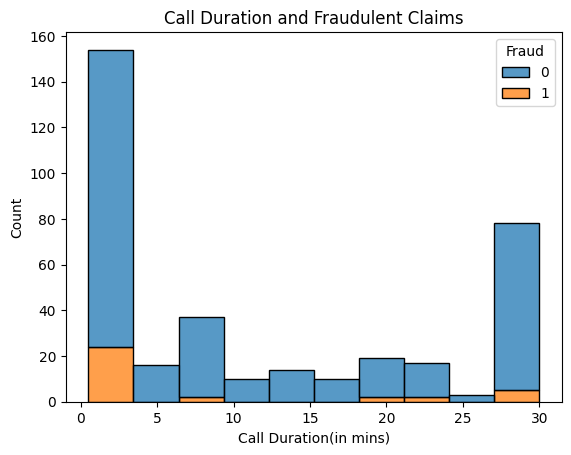

In [20]:
sns.histplot(x = 'Call_details', data = df, hue = 'Fraud', multiple='stack').set_title('Call Duration and Fraudulent Claims')
plt.xlabel('Call Duration(in mins)')


Purpose of contact and Fraudulent Claims

Text(0.5, 1.0, 'Purpose and Fraudulent Claims')

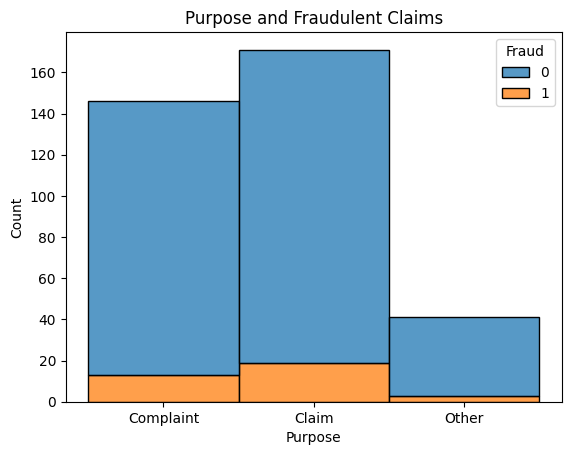

In [21]:
sns.histplot(x = 'Purpose', data = df, hue = 'Fraud', multiple='stack').set_title('Purpose and Fraudulent Claims')


Data Preprocessing Part 2

Outlier Removal

In [22]:
Q1 = df['Claim_Value'].quantile(0.25)
Q3 = df['Claim_Value'].quantile(0.75)

IQR = Q3 - Q1

df = df[~((df['Claim_Value'] < (Q1 - 1.5 * IQR)) |(df['Claim_Value'] > (Q3 + 1.5 * IQR)))]


Label Encoding the Object Datatypes

In [23]:
from sklearn.preprocessing import LabelEncoder

#Label encoding Object
le = LabelEncoder()

# columns for label encoding
cols = df.select_dtypes(include=['object']).columns

# label encoding
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())


Region [4 1 2 3 5 6 7 0]
State [10  6 16  9 11  0  2  5  3 13 19  4  8  1 15 12 18 17  7 14]
Area [1 0]
City [ 2  5  6 21 11  9 18 20 24 16 15  1 19 12 26 17 23  8 10  3 14  7  0 22
  4 25 13]
Consumer_profile [0 1]
Product_category [0 1]
Product_type [1 0]
AC_1001_Issue [0 1 2]
AC_1002_Issue [0 1 2]
AC_1003_Issue [0 2 1]
TV_2001_Issue [1 0 2]
TV_2002_Issue [2 0 1]
TV_2003_Issue [0 2 1]
Purchased_from [2 0 1]
Purpose [1 0 2]


Correlation Matrix Heatmap

<Axes: >

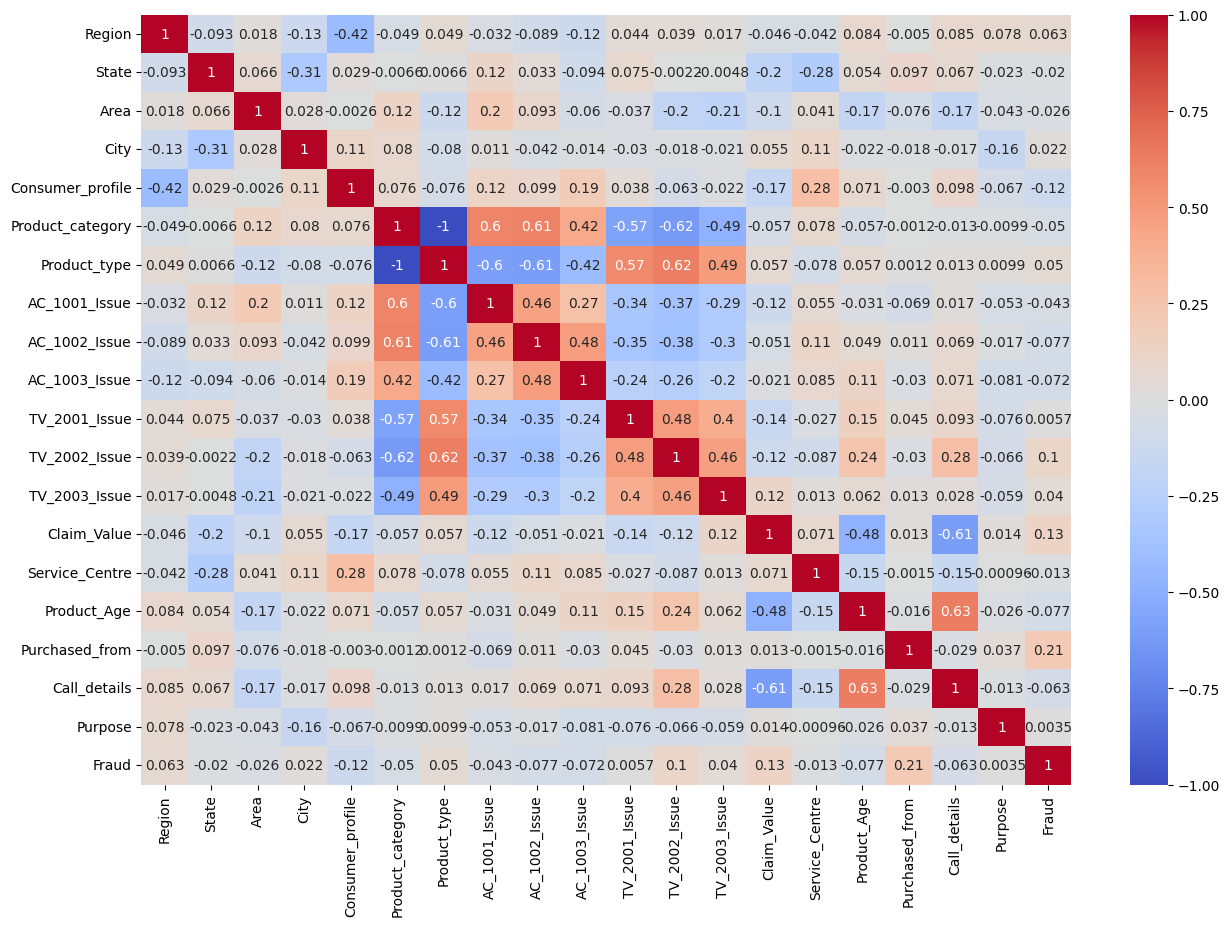

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')



Train Test Split


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Fraud',axis=1), df['Fraud'], test_size=0.30, random_state=42)


Model Building

Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()


Hyperparameter Tuning using GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Decision Tree Classifier
grid = GridSearchCV(dtree, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

#Fitting the grid search object to the training data
grid.fit(X_train,y_train)

#Best parameters for Decision Tree Classifier
print(grid.best_params_)


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [28]:
#Best estimator for Decision Tree Classifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the Decision Tree Classifier to the training data
dtree.fit(X_train,y_train)

#training accuracy
print(dtree.score(X_train,y_train))

#prediction on test data
d_pred = dtree.predict(X_test)

0.9313304721030042


Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier()

Hyperparameter Tuning using GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Random Forest Classifier
grid = GridSearchCV(rfc, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

#Fitting the grid search object to the training data
grid.fit(X_train,y_train)

#Best parameters for Random Forest Classifier
print(grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [31]:
#random forest classifier with best parameters
rfc = RandomForestClassifier(criterion='gini', max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the Random Forest Classifier to the training data
rfc.fit(X_train,y_train)

#training accuracy
print(rfc.score(X_train,y_train))

#prediction on test data
r_pred = rfc.predict(X_test)


0.9184549356223176



Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Object
lr = LogisticRegression()

#Fitting the Logistic Regression to the training data
lr.fit(X_train,y_train)

#training accuracy
print(lr.score(X_train,y_train))

#prediction on test data
l_pred = lr.predict(X_test)


0.9184549356223176


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluation
Confusion Matrix Heatmap

Text(0.5, 1.0, 'Logistic Regression')

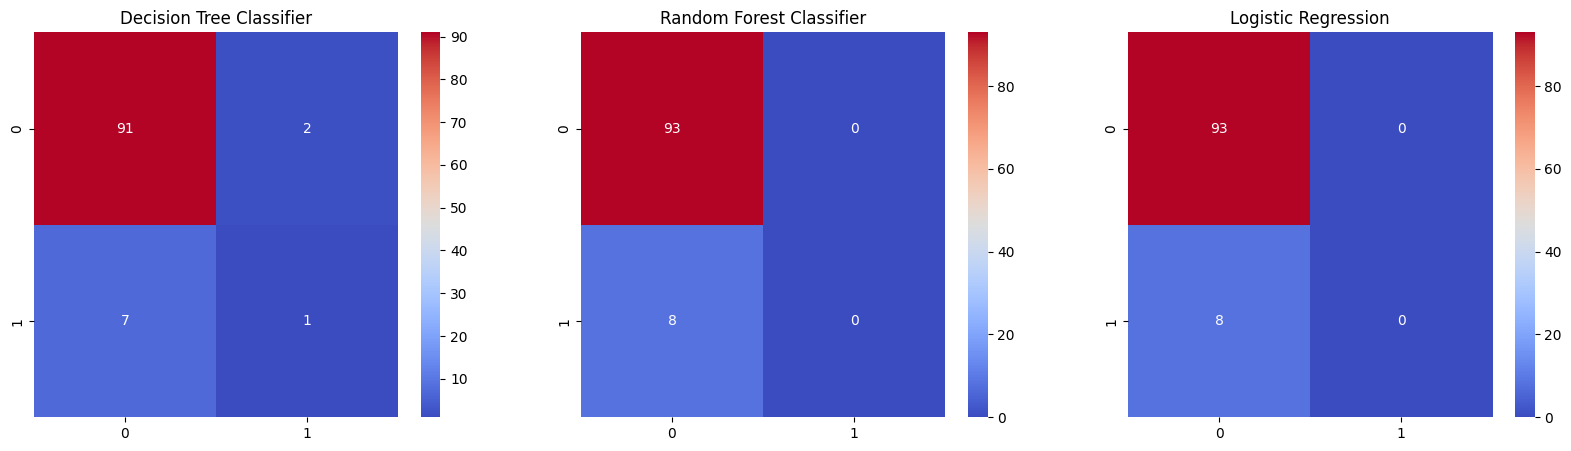

In [33]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

from sklearn.metrics import confusion_matrix

#confusion matrix for Decision Tree Classifier
sns.heatmap(confusion_matrix(y_test,d_pred), annot=True, cmap='coolwarm', ax=ax[0]).set_title('Decision Tree Classifier')

#confusion matrix for Random Forest Classifier
sns.heatmap(confusion_matrix(y_test,r_pred), annot=True, cmap='coolwarm', ax=ax[1]).set_title('Random Forest Classifier')

#confusion matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test,l_pred), annot=True, cmap='coolwarm', ax=ax[2]).set_title('Logistic Regression')

Classification Report

In [35]:
from sklearn.metrics import classification_report

#classification report for Decision Tree Classifier
print(classification_report(y_test,d_pred))

#classification report for Random Forest Classifier
print(classification_report(y_test,r_pred))

#classification report for Logistic Regression
print(classification_report(y_test,l_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        93
           1       0.33      0.12      0.18         8

    accuracy                           0.91       101
   macro avg       0.63      0.55      0.57       101
weighted avg       0.88      0.91      0.89       101

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        93
           1       0.00      0.00      0.00         8

    accuracy                           0.92       101
   macro avg       0.46      0.50      0.48       101
weighted avg       0.85      0.92      0.88       101

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        93
           1       0.00      0.00      0.00         8

    accuracy                           0.92       101
   macro avg       0.46      0.50      0.48       101
weighted avg       0.85      0.92      0.88       101



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [36]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

print('==================== Decision Tree Classifier ====================')
print('Accuracy Score: ', accuracy_score(y_test,d_pred))
print('R2 Score: ', r2_score(y_test,d_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,d_pred))

print('==================== Random Forest Classifier ====================')
print('Accuracy Score: ', accuracy_score(y_test,r_pred))
print('R2 Score: ', r2_score(y_test,r_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,r_pred))

print('==================== Logistic Regression =========================')
print('Accuracy Score: ', accuracy_score(y_test,l_pred))
print('R2 Score: ', r2_score(y_test,l_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,l_pred))


==================== Decision Tree Classifier ====================
Accuracy Score:  0.9108910891089109
R2 Score:  -0.2217741935483868
Mean Squared Error:  0.0891089108910891
==================== Random Forest Classifier ====================
Accuracy Score:  0.9207920792079208
R2 Score:  -0.08602150537634379
Mean Squared Error:  0.07920792079207921
==================== Logistic Regression =========================
Accuracy Score:  0.9207920792079208
R2 Score:  -0.08602150537634379
Mean Squared Error:  0.07920792079207921


Feature Importance

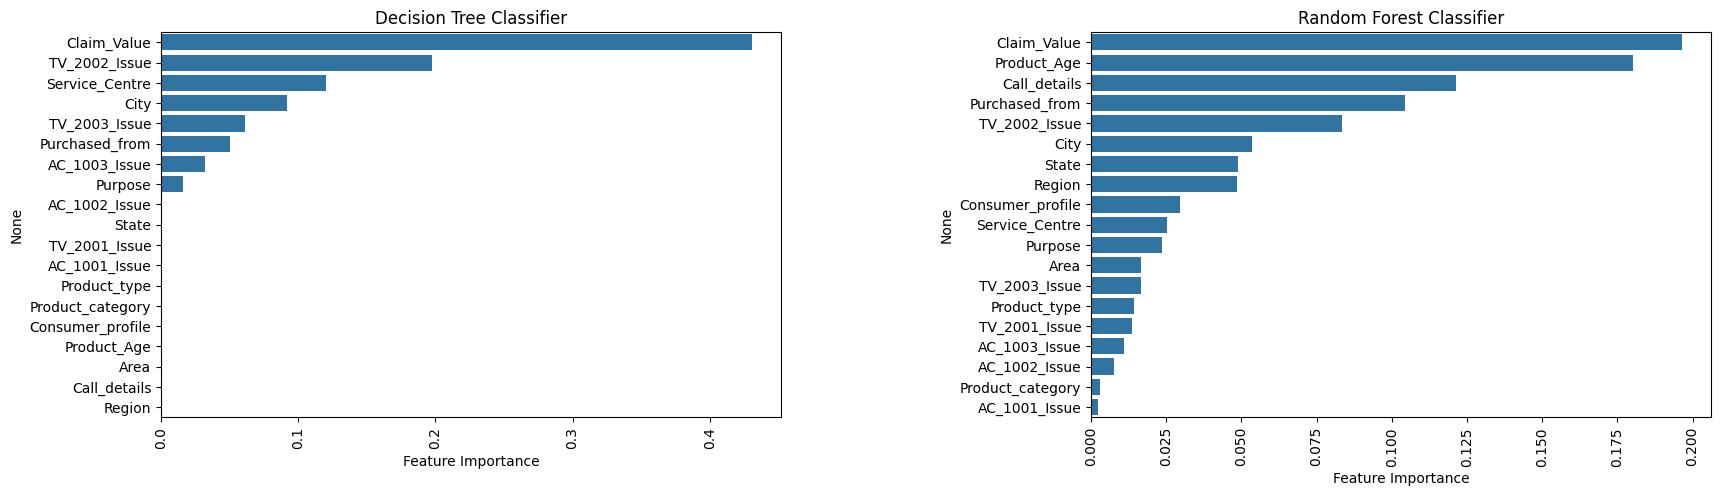

In [37]:
#feature importance for Decision Tree Classifier
feature_importance_d = pd.DataFrame(dtree.feature_importances_, index=X_train.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

#feature importance for Random Forest Classifier
feature_importance_r = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

fig, ax = plt.subplots(1,2,figsize=(20,5))
#space between subplots
fig.subplots_adjust(wspace=0.5)
sns.barplot(y=feature_importance_d.index, x=feature_importance_d['Feature Importance'], ax=ax[0]).set_title('Decision Tree Classifier')
ax[0].xaxis.set_tick_params(rotation=90)
sns.barplot(y=feature_importance_r.index, x=feature_importance_r['Feature Importance'], ax=ax[1]).set_title('Random Forest Classifier')
ax[1].xaxis.set_tick_params(rotation=90)


Conclusion
From the exploratory data analysis, I have concluded that most of the warranty claims takes place in the southern region of India particularly in Andhra Pradesh and Tamil Nadu. Moreover, the fraudulent claims are more frequent in the cities like Hyderabad and Chennai whih are urban regions. The dataset includes the claims regarding two products i.e. TV and AC. The TVs had the higher warranty claims when they where purchased for personal purposes as compared to AC.

Moreover, in the case of Ac the fraudulent claims were made, when there was no issue in the AC parts. However, in the case of TV the fraudulent claims were made, when there was issue in the TV parts as well as when there was no issue in the TV parts. The fraudulent claims were more frequent when the purchase was made through the manufacturer.

The fraudulent claims tend to have higher claim value as compared to the genuine ones, and the service centre 13 had the highest number of fraudulent claims despite of having lesser number of total warranty claims. It was also observed that the fraudulent claims were more frequent when the customer care call duration was less than 3-4 minutes.

Coming to the machine learning models, I have used Decision Tree Classifier, Random Forest Classifier and Logistic Regression. All these models gave excellent accuracy of 91-92%. However, due to lesser number of fraudulent claims or small dataset size, the models have poor recall score for fraudulent claims. But this issue can be resolved by collecting more data.
